# TASK 1: IRIS FLOWER CLASSIFICATION

## Introduction:

The IRIS FLOWER CLASSIFICATION task at hand involves training a machine learning model for the classification of Iris flowers based on their measurements. The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species are distinguished by their specific measurements. The goal is to utilize machine learning techniques to build a model that can accurately classify iris flowers into their respective species based on the provided measurements.

In this context, the Scikit-learn library is a widely used tool that offers a pre-existing dataset for Iris flower classification. However, for this particular task, it is suggested to download the dataset from an external source, implying flexibility in the data source selection.


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Iris.csv")      #Reads the Iris Dataset

### Data Analysis

In [3]:
data.head()         #Displays Iris Information upto 4 entries 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()         #Displays Information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Data Exploration

In [5]:
data.shape   #Define shape of Dataset

(150, 6)

In [6]:
data.isnull().sum()  #Check the number of missing values in each column


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.columns   #Define Columns in Dataset

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
data.tail(6)   #Gives Information for Last 6 entries

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
data.describe()   #Describes the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


## Training Dataset

### Calculate Maximum and Minimum 

In [11]:
print("Maximum Sepal Width: ",data['SepalWidthCm'].max())
print("Minimum Sepal Width: ",data['SepalWidthCm'].min())


Maximum Sepal Width:  4.4
Minimum Sepal Width:  2.0


In [12]:
print("Maximum Sepal Length: ",data['SepalLengthCm'].max())
print("Minimum Sepal Length: ",data['SepalLengthCm'].min())


Maximum Sepal Length:  7.9
Minimum Sepal Length:  4.3


In [13]:
print("Maximum Petal Width: ",data['PetalWidthCm'].max())
print("Minimum Petal Width: ",data['PetalWidthCm'].min())

Maximum Petal Width:  2.5
Minimum Petal Width:  0.1


In [14]:
print("Maximum Petal Length: ",data['PetalLengthCm'].max())
print("Minimum Petal Length: ",data['PetalLengthCm'].min())


Maximum Petal Length:  6.9
Minimum Petal Length:  1.0


In [15]:
spec = data.groupby("Species")

In [16]:
spec.count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


## Data Visualization

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

### Histogram for Iris Dataset

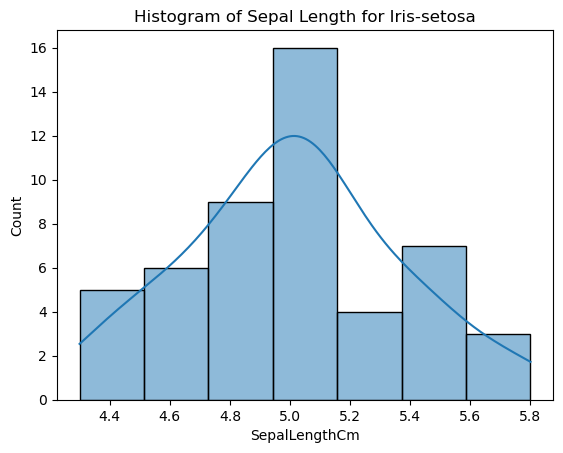

In [18]:
species_to_plot = 'Iris-setosa'                                             
subset_data = data[data['Species'] == species_to_plot]

# Create the histogram
sb.histplot(data=subset_data, x='SepalLengthCm', kde=True)
plt.title(f'Histogram of Sepal Length for {species_to_plot}')
plt.show()

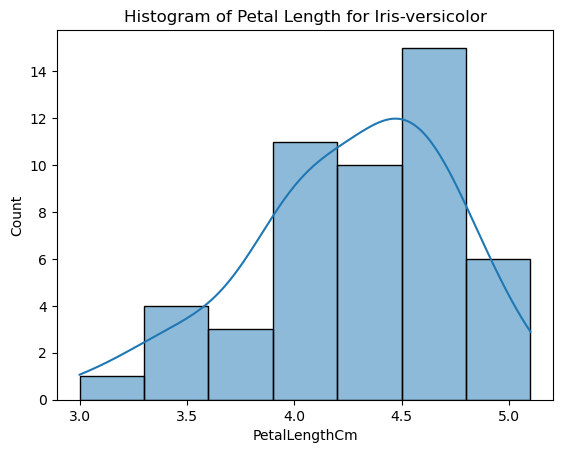

In [19]:
species_to_plot = 'Iris-versicolor'                                             
subset_data = data[data['Species'] == species_to_plot]

# Create the histogram
sb.histplot(data=subset_data, x='PetalLengthCm', kde=True)
plt.title(f'Histogram of Petal Length for {species_to_plot}')
plt.show()

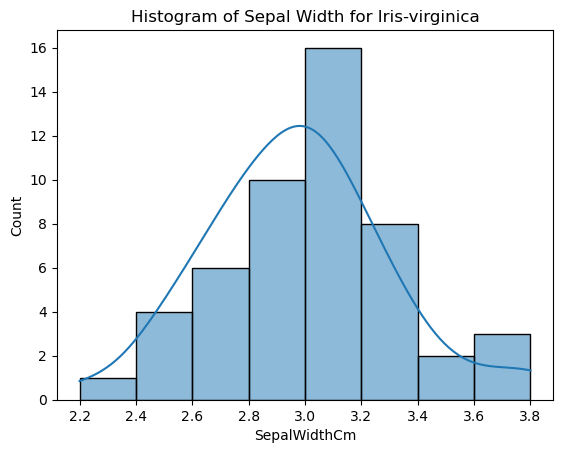

In [20]:
species_to_plot = 'Iris-virginica'                                             
subset_data = data[data['Species'] == species_to_plot]

# Create the histogram
sb.histplot(data=subset_data, x='SepalWidthCm', kde=True)
plt.title(f'Histogram of Sepal Width for {species_to_plot}')
plt.show()

### PairPlot for Iris Dataset

C:\Users\AAYUSHI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


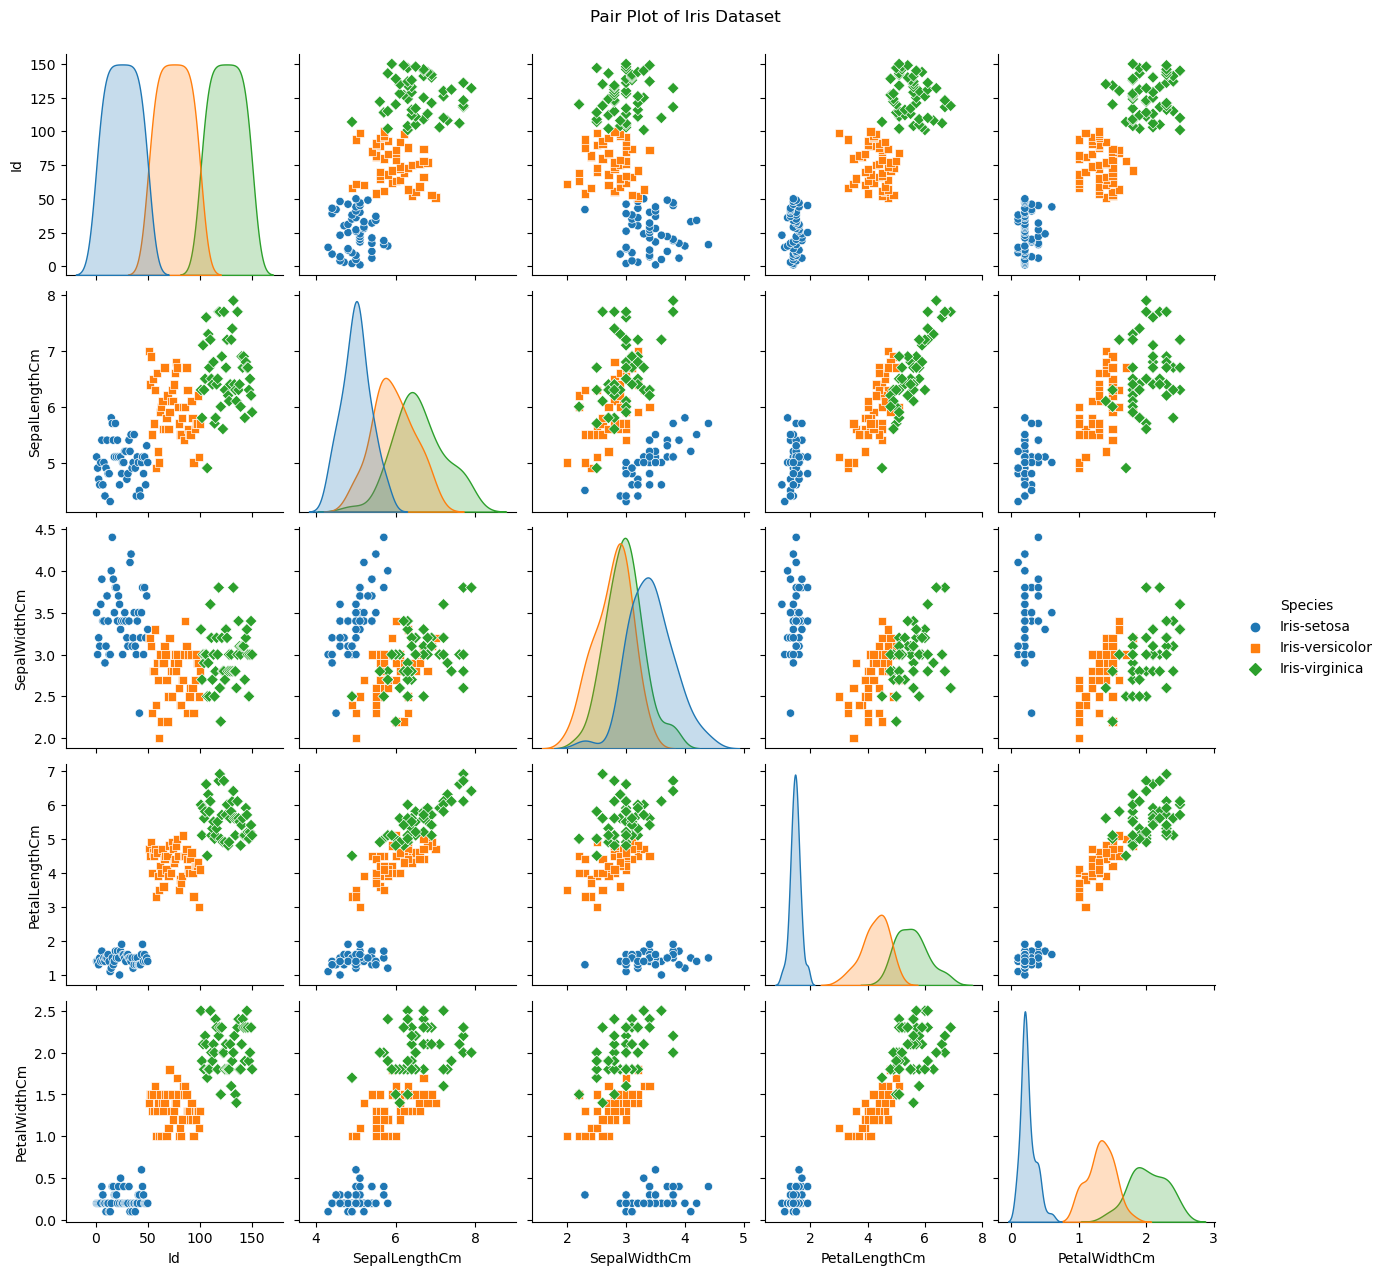

In [21]:
sb.pairplot(data, hue='Species', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()


### BoxPlot for Iris Dataset

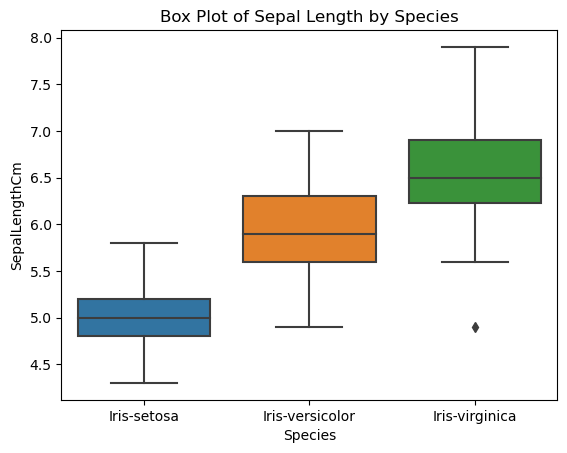

In [22]:
sb.boxplot(x='Species', y='SepalLengthCm', data=data)
plt.title('Box Plot of Sepal Length by Species')
plt.show()


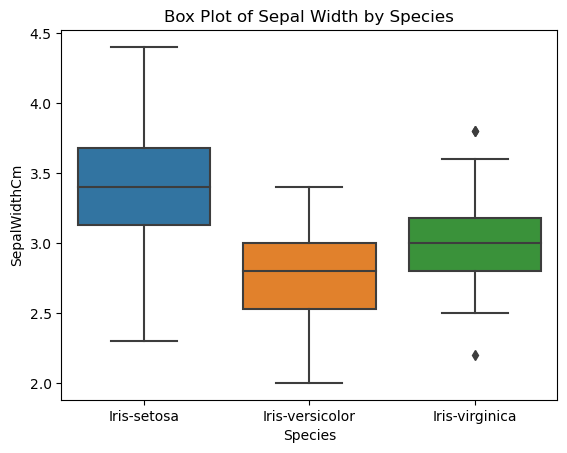

In [23]:
sb.boxplot(x='Species', y='SepalWidthCm', data=data)
plt.title('Box Plot of Sepal Width by Species')
plt.show()

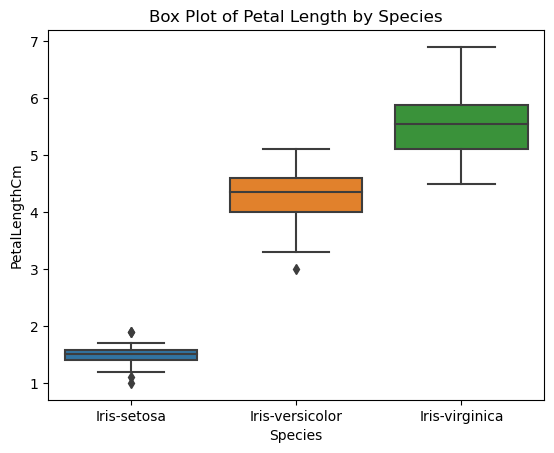

In [24]:
sb.boxplot(x='Species', y='PetalLengthCm', data=data)
plt.title('Box Plot of Petal Length by Species')
plt.show()

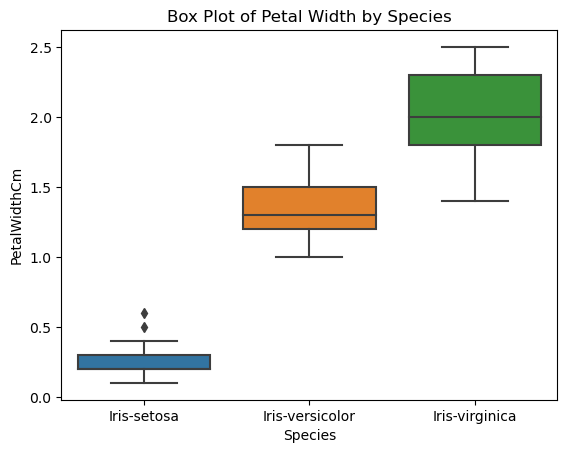

In [25]:
sb.boxplot(x='Species', y='PetalWidthCm', data=data)
plt.title('Box Plot of Petal Width by Species')
plt.show()

### Scatter plot for Sepal Length vs Sepal Width

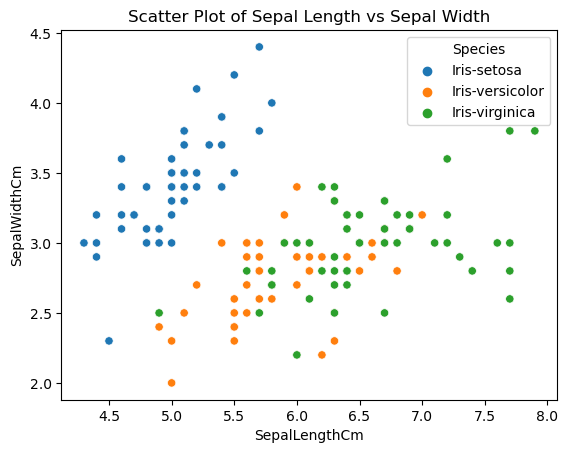

In [26]:
sb.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()


### Scatter plot for Petal Length vs Petal Width

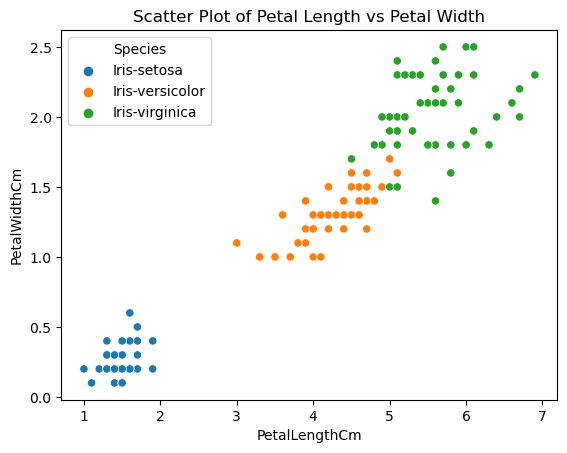

In [27]:
sb.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=data)
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()


### Data Splitting with Training and Testing

In [28]:
x=data.iloc[: ,1:-1 ]            #Splitting Features and Labels
y=data.iloc[: , -1]

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier()        # Initialize the Random Forest Classifier

rf.fit(x_train, y_train)             # Train the model

rf_pred = rf.predict(x_test)         # Make predictions on the test set

score_rf = accuracy_score(y_test, rf_pred)
conf_matrix = confusion_matrix(y_test, rf_pred)  # Evaluate the model

print("Random Forest Accuracy:", score_rf)  # Print the results
print("Confusion Matrix:")
print(conf_matrix)

Random Forest Accuracy: 1.0
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()      #Initialize the Decision Tree Classifier

dt.fit(x_train, y_train)           # Train the model`

dt_pred = dt.predict(x_test)       #Make predictions on the test set

score_dt = accuracy_score(y_test, dt_pred)
conf_matrix_dt = confusion_matrix(y_test, dt_pred)   #Evaluate the model

print("Decision Tree Accuracy:", score_dt)    #Print the results
print("Confusion Matrix:")
print(conf_matrix_dt)

Decision Tree Accuracy: 1.0
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [32]:
from sklearn.linear_model import LogisticRegression              #Using Logistic Regression for Prediction

lr = LogisticRegression(max_iter=1000)

lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

score_lr = accuracy_score(lr_pred, y_test)
print("Decision Tree:", score_lr)
print("Confusion Matrix: ", confusion_matrix(y_test, lr_pred))

Decision Tree: 1.0
Confusion Matrix:  [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


## Testing and Prediction of Iris Flower Classification

In [33]:
print("Welcome to the Iris Flower Measurement Input!")

sl = float(input("Enter Sepal Length (in cm): "))       # Get user input for sepal and petal measurements
sw = float(input("Enter Sepal Width (in cm): "))
pl = float(input("Enter Petal Length (in cm): "))
pw = float(input("Enter Petal Width (in cm): "))

print("\nYou entered the following values:")            # Display the input values
print(f"Sepal Length: {sl} cm")
print(f"Sepal Width: {sw} cm")
print(f"Petal Length: {pl} cm")
print(f"Petal Width: {pw} cm")

Welcome to the Iris Flower Measurement Input!
Enter Sepal Length (in cm): 5.1
Enter Sepal Width (in cm): 3.8
Enter Petal Length (in cm): 1.5
Enter Petal Width (in cm): 0.3

You entered the following values:
Sepal Length: 5.1 cm
Sepal Width: 3.8 cm
Petal Length: 1.5 cm
Petal Width: 0.3 cm


In [35]:
prediction = np.array([[sl,sw,pl,pw]])                  #Prediction
print(lr.predict(prediction))
import warnings
warnings.filterwarnings("ignore", category=UserWarning) #Suppress warnings


['Iris-setosa']


## Conclusion:

In conclusion, the iris flower classification task demonstrates the application of machine learning in distinguishing between different species based on their measurements. Through the process of training a model on the Iris dataset, the goal is to create a classifier capable of accurately predicting the species of an iris flower given its measurements. This task not only highlights the practical implementation of machine learning techniques but also emphasizes the importance of dataset selection in model training. Whether utilizing the widely-used Scikit-learn dataset or an alternative source, the objective remains to create an effective and reliable model for iris flower classification.